,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


Fare        0.386325
Age         0.264573
Sex         0.158010
Parch       0.008265
SibSp       0.008053
Embarked    0.000000
Pclass      0.000000
Name: MI Scores, dtype: float64


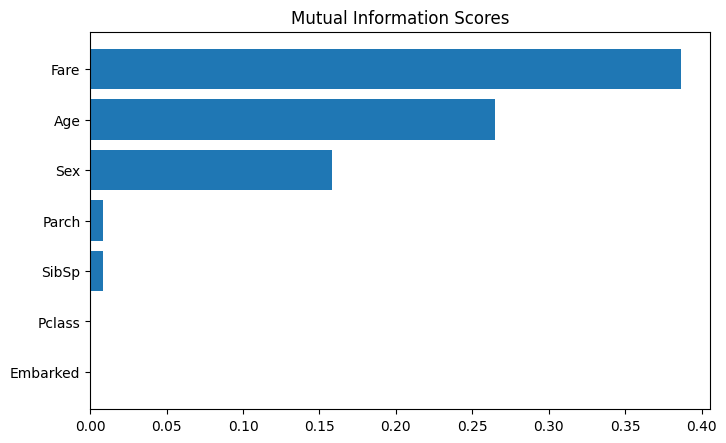

In [1]:
#9.1
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
#função que produz um gráfico indicado o Mutual Information score de cada feature existente no banco de dados d treino, em relação ao target
dftrain =  pd.read_csv('../input/titanic/train.csv')
display(dftrain)
train=dftrain
dftrain=dftrain.dropna()
feat = dftrain.loc[:,['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass']]
featdiscr = dftrain.loc[:,['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
dftest = pd.read_csv('../input/titanic/test.csv')
target = dftrain['Survived']
X = feat[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass']]

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    disc= X[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
    
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, target, disc):
    mi_scores = mutual_info_classif(X, target, discrete_features=disc)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, target, disc)
print(mi_scores)  # show a few features with their MI scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

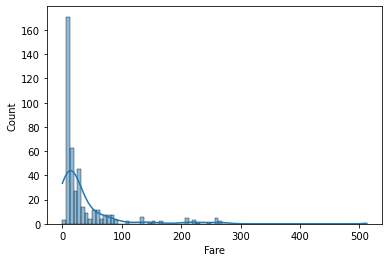

In [2]:
#Construção de dois gráficos do tipo sns.histplot para a análise de “Fare”.
#A distribuição total das taxas.
display(sns.histplot(data=dftest, x="Fare", kde=True))

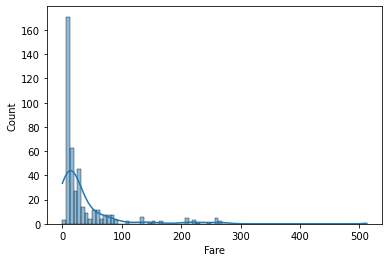

In [3]:
#A distribuição relacionada com o total e target
th=sns.histplot(data=dftest, x="Fare", kde=True)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

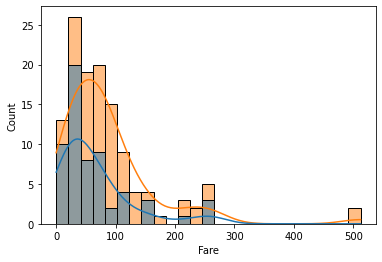

In [4]:
sns.histplot(dftrain, x="Fare", hue="Survived",kde=True,legend=False)

In [5]:
#Realize uma análise em relação à distribuição total, se a curva é normal
#ou não, por exemplo. Qual a influência da feature “Fare” no target que
#pode ser percebida a partir do segundo gráfico?
#RES: A curva tem um pico no inicio e depois diminui. No grafico 2 a curva diminui conforme o fare aumenta


<AxesSubplot:xlabel='Sex', ylabel='Count'>

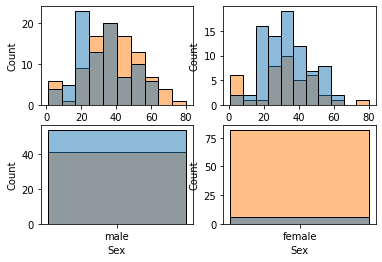

In [6]:
#4 gráficos também utilizando histogramas com seaborn.
#Tais gráficos relacionam a Feature “Age” com “Sex”.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
sur= dftrain['Survived'] == 1
male = (dftrain['Sex'] == 'male')
fema= (dftrain['Sex'] == 'female')
sns.histplot(dftrain, x="Age", hue="Sex",legend=False, ax=ax1)
sns.histplot(data=dftrain[sur], x='Age', hue='Sex',legend=False, ax=ax2)
sns.histplot(dftrain[male], x='Sex', hue="Survived",legend=False, ax=ax3)
sns.histplot(dftrain[fema], x='Sex', hue="Survived",legend=False, ax=ax4)
#RES:mulheres e jovens tem mais chance de sobreviver

In [7]:
#9.2
# dropping null value columns to avoid errors
dftrain2=dftrain.copy()
dftrain2.dropna(inplace = True)
  
# new data frame with split value columns
new = dftrain2["Name"].str.split(",", n = 1, expand = True)
new2 = dftrain2["Name"].str.split(".", n = 1, expand = True)
  
# making separate column from new data frame
dftrain2["Title5"]= new[0]
  
# making separate column from new data frame
dftrain2["Title2"]= new2[0]
  
# Dropping old Name and Title5 columns
dftrain2.drop(columns =["Name",'Title5'], inplace = True)
new3 = dftrain2["Title2"].str.split(" ", n = 1, expand = True)
dftrain2['Title']=new3[1]
dftrain2.drop(columns =['Title2'], inplace = True)
# dftrain2 display
dftrain2


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Mrs
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Mrs
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss


In [8]:
#feature que indica o tamanho da família, somando “SibSp” e “Parch”.
dftrain2['Tamanho da familia']= dftrain["SibSp"]+dftrain2["Parch"]
#feature booleana indicando se o passageiro está sozinho, sendo, verdadeiro caso não tenha nenhum familiar a bordo, e falso caso tenha.
dftrain2['Sozinho']=dftrain2['Tamanho da familia']<1
dftrain2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Tamanho da familia,Sozinho
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,False
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr,0,True
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2,False
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Miss,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Mrs,2,False
872,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,0,True
879,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Mrs,1,False
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,0,True


In [9]:
#9.3
#criar grupos utilizando K-means como forma de clustering.
#gráfico, do tipo scatter plot, colocando “Age” e “Fare” como eixos.
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;
fig  = px.scatter(dftrain, x = 'Age', y = 'Fare', log_x = True, width = 800)
fig.show()
#RES: Posso tirar os outlier utilizando o método de John Tukey  (John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44 ) em uma função.

In [10]:
#Agora será necessário criar os grupos utilizando a biblioteca K-means do sklearn
df = dftrain.loc[dftrain["Fare"] < 500, [ 'Fare','Age']]
df
from sklearn.cluster import KMeans
# Create cluster feature
kmeans = KMeans(n_clusters=6)
df["Grupo"] = kmeans.fit_predict(df)
df["Grupo"] = df["Grupo"].astype("category")

df.head()

,Fare,Age,Grupo
1,71.2833,38.0,2
3,53.1000,35.0,4
6,51.8625,54.0,4
10,16.7000,4.0,0
11,26.5500,58.0,3


In [11]:
#Adicionando a nova feature ao banco de dados de treino.
treinonew = pd.merge(dftrain2, df, how = 'outer')
display(treinonew)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Tamanho da familia,Sozinho,Grupo
0,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,False,2
1,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,False,4
2,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,Mr,0,True,4
3,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2,False,0
4,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Miss,0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,872,1,1,female,47.0,1,1,11751,52.5542,D35,S,Mrs,2,False,4
183,873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,0,True,0
184,880,1,1,female,56.0,0,1,11767,83.1583,C50,C,Mrs,1,False,2
185,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss,0,True,0


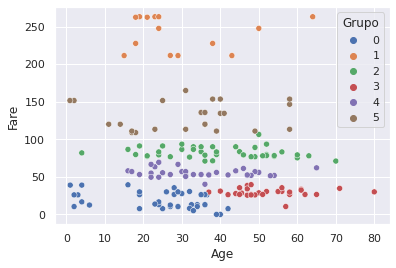

In [12]:
#Construir um gráfico scatter plot que mostra a distribuição “Fare” x “Age”, tendo os grupos como camadas.
fig2  = sns.scatterplot(data =treinonew, x = 'Age', y = 'Fare', hue ='Grupo')

<AxesSubplot:xlabel='Grupo', ylabel='Survived'>

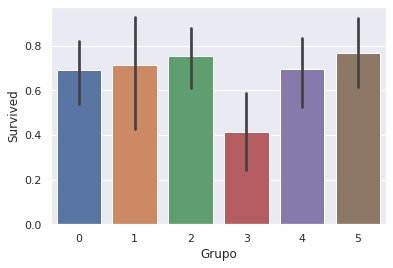

In [13]:
#gráfico bar chart que indique a chance de sobrevivência, em média, de cada grupo.
sns.barplot(data=treinonew,x="Grupo", y="Survived")
#Em média o grupo 5 e 3 tem mais chance de sobreviver, em média, do que os outros grupos. O 4 é o que tem menos chance.

In [14]:
rt = treinonew.loc[treinonew['Grupo'].isna(),:]
treinonew['Grupo'] = treinonew['Grupo'].fillna(3)
display(rt)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Tamanho da familia,Sozinho,Grupo
142,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,1,False,NaN
158,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,0,True,NaN


In [15]:
#utilizando mutual information, se a nova feature é significativa para a previsão do target
targetw = treinonew['Survived']
xx = treinonew[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass','Title','Tamanho da familia','Sozinho','Grupo']]
# Label encoding for categoricals
for colnames in xx.select_dtypes("object"):
    xx[colnames], _ = xx[colnames].factorize()
    disct= 'auto'#xx[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Title','Sozinho']]# Label encoding for categoricals
def make_mi_scores(X, target, disc):
    mi_scores = mutual_info_classif(X, target, discrete_features=disc)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scoresss = make_mi_scores(xx, targetw, disct)
print(mi_scoresss)  # show a few features with their MI scores

Sex                   0.137458
Title                 0.095714
Age                   0.074615
Embarked              0.050092
Fare                  0.049192
Grupo                 0.016215
SibSp                 0.004012
Parch                 0.000000
Pclass                0.000000
Tamanho da familia    0.000000
Sozinho               0.000000
Name: MI Scores, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:976: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [16]:
#Scaling das features “Age” e “Fare”, entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(treinonew[['Age','Fare']]))
scaled_data=scaler.transform(treinonew[['Age','Fare']])
dff = pd.DataFrame(data=treinonew,columns=["Age","Fare"])
scaled_df = pd.DataFrame(data=scaled_data,columns=dff.columns)
scaled_df.head()


MinMaxScaler()


,Age,Fare
0,0.468892,0.139136
1,0.430956,0.103644
2,0.671219,0.101229
3,0.038948,0.032596
4,0.721801,0.051822


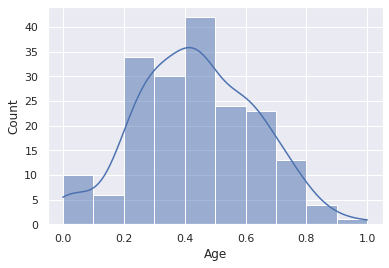

In [17]:
#Fazer um histograma com a coluna “Age” do novo dataframe.
his=sns.histplot(data=scaled_df, x="Age", kde=True)

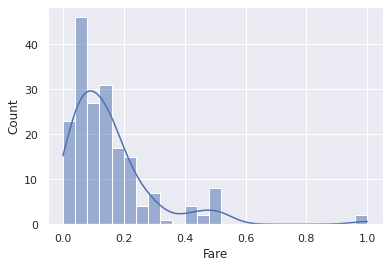

In [18]:
#Fazer um histograma com a coluna “Fare” do novo dataframe.
hist=sns.histplot(data=scaled_df, x="Fare", kde=True)

In [19]:
#Realizar o PCA no dataframe com features escaladas
features = ["Age", "Fare"]
X = scaled_df.copy()
#y = X['Age']
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()
#RES:As duas colunas tem em comum muitos valores negativos

,PC1,PC2
0,-0.183828,0.039120
1,-0.217121,-0.267511
2,-1.094259,0.586493
3,0.854890,-2.019995
4,-1.513085,0.532119


In [20]:
#Agora, o último passo será avaliar a nova feature criada pelo PCA, utilizando o mesmo
#processo encontrado no curso de feature engineering do kaggle, no capítulo Principal
#Component Analysis. É viável, com essas técnicas, a substituição das features “Fare”
#e “Age” por apenas uma?
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2
Age,-0.707107,0.707107
Fare,0.707107,0.707107


In [21]:
def make_mi_scores(X,target):
    mi_scores = mutual_info_classif(X,target)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X_pca,targetw)
mi_scores

PC1    0.048469
PC2    0.013307
Name: MI Scores, dtype: float64

In [22]:
# Show dataframe sorted by PC1
target=dftrain['Survived']
idx = X_pca["PC1"].sort_values(ascending=False).index
cols = ["Age", "Fare"]
scaled_df.loc[idx, cols]

,Age,Fare
158,0.430956,1.000000
142,0.443601,1.000000
59,0.215984,0.512122
7,0.228629,0.513342
160,0.253920,0.512122
...,...,...
161,0.873546,0.138583
43,0.772382,0.051822
97,0.810319,0.051822
15,0.886191,0.067640


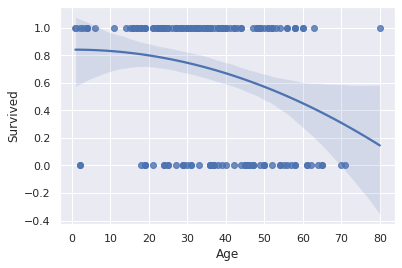

In [23]:
treinonewww = pd.merge(scaled_df, treinonew, how = 'outer')
scaled_df["Age"] = X.Age / X.Fare
sns.regplot(x="Age", y='Survived', data=treinonewww, order=2);
#RES:Não foi viavel 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



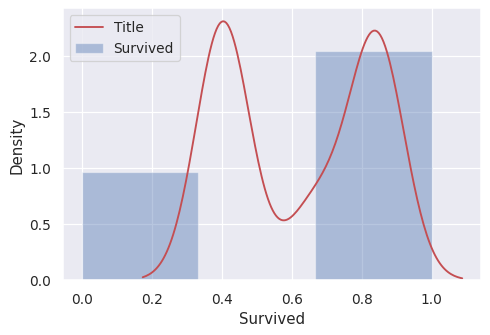

In [24]:
#9.4 - Target Encoding
#Encoding da feature “Title”
X = treinonew.copy()
y = X.pop('Survived')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Title"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
#Plot da distribuição dos valores codificados
ax = sns.kdeplot(X_train.Title, color='r', ax=ax)
ax.set_xlabel("Survived")
ax.legend(labels=['Title', 'Survived']);


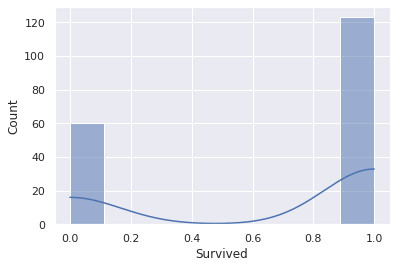

In [25]:
histtt=sns.histplot(data=dftrain, x="Survived", kde=True)